## Question 1


Problem 1: Take any geographical data of size 50 consisting at least 5 variables (eg: longitude, latitude,
temperature, elevation, area). Fit a multiple regression model and check the validity of model based on the
assumptions: Linearity, Normality, Multicollinearity, Autocorrelation and Homoscedasticity.



In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
data = pd.read_excel('geographical_data.xlsx', index_col= 0)
data

,longitude,latitude,temperature,elevation,area
0,97.373060,-13.872955,8.350300,451.547025,731.586470
1,-24.144931,8.232742,21.535296,791.075984,951.554448
2,59.613984,-42.669835,23.249565,57.733477,230.844151
3,-61.807476,-40.604863,8.923583,694.040816,893.791284
4,-60.866981,-7.498574,14.364700,1744.422470,758.579925
...,...,...,...,...,...
95,-139.341017,-86.369866,14.697251,276.699903,959.990744
96,8.076315,37.078144,2.883208,65.110548,756.447463
97,55.683578,-40.522968,8.549527,1032.566675,982.205150
98,89.522054,-4.443220,13.524718,1530.930196,1.518415


In [10]:
# Fit the multiple regression model
X = data[['longitude', 'latitude', 'temperature', 'elevation']]
y = data['area']
X = sm.add_constant(X)  # Add a constant for the intercept term
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.033
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.394
Time:                        19:52:33   Log-Likelihood:                -705.89
No. Observations:                 100   AIC:                             1422.
Df Residuals:                      95   BIC:                             1435.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         652.5579    104.421      6.249      

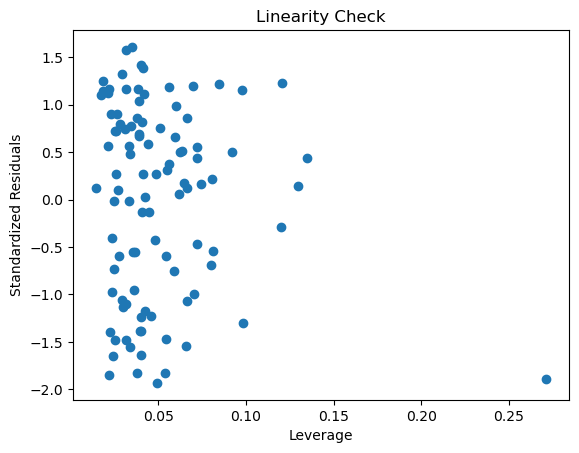

In [17]:
# Assuming X and y are defined
X = sm.add_constant(X)  # Add an intercept to our model
model = sm.OLS(y, X).fit()  # Fit the model

# Get influence of each observation
influence = model.get_influence()

# Create a scatter plot
plt.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal)
plt.title('Linearity Check')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()


##### Linearity: The linearity check plot should not show any specific patterns. If there is a pattern, it indicates a violation of the linearity assumption.

In [12]:
# Check for normality
import scipy.stats as stats
residuals = model.resid
_, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk p-value: {p_value}')



Shapiro-Wilk p-value: 0.00011317392636556178


##### Normality: The Shapiro-Wilk p-value should be greater than 0.05 to accept the null hypothesis of normality.

In [13]:
# Check for multicollinearity
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
print(vif)

   VIF Factor     Features
0   13.075355        const
1    1.018794    longitude
2    1.035059     latitude
3    1.014725  temperature
4    1.011515    elevation


##### Multicollinearity: The VIF values should be less than 5 (or 10, according to different sources) for all features to avoid multicollinearity issues.

In [14]:
# Check for autocorrelation
from statsmodels.stats.stattools import durbin_watson
print(f'Durbin-Watson: {durbin_watson(model.resid)}')

Durbin-Watson: 1.9242684401770391


##### Homoscedasticity: The plot of fitted values vs. residuals should not show any specific pattern. If there is a pattern, it indicates a violation of the homoscedasticity assumption.

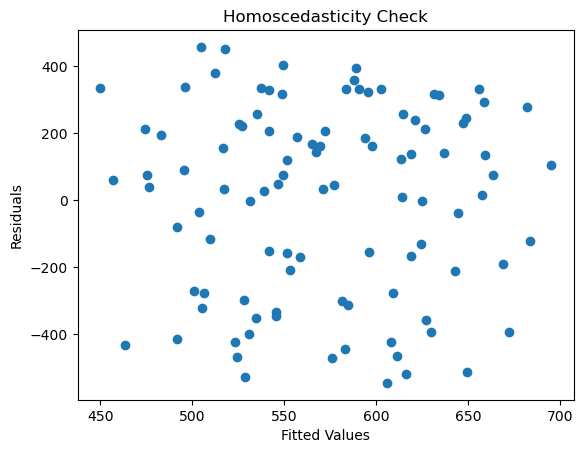

In [15]:
# Check for homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.title('Homoscedasticity Check')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

##### Homoscedasticity: The plot of fitted values vs. residuals should not show any specific pattern. If there is a pattern, it indicates a violation of the homoscedasticity assumption.

## Question 2
Create your own dataset of size 15 having 4 variables for Sport area and test for multicollinearity
using VIF. Further remove and combine the highly correlated variables and test them again for multicollinearity
using VIF.


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Create a sample dataset
data = {
    'Players': [25, 18, 32, 20, 28, 22, 30, 24, 27, 26, 31, 19, 23, 29, 21],
    'Area_sqft': [5000, 3500, 7000, 4200, 6000, 4800, 6500, 5200, 5800, 5500, 6800, 4000, 5000, 6200, 4500],
    'Revenue_million': [2.5, 1.2, 4.8, 1.8, 3.2, 2.1, 4.0, 2.7, 3.0, 2.9, 4.5, 1.5, 2.4, 3.8, 1.9],
    'Expenses_million': [1.8, 0.9, 3.2, 1.3, 2.4, 1.6, 2.9, 1.9, 2.2, 2.1, 3.0, 1.1, 1.7, 2.6, 1.4]
}

data = pd.DataFrame(data)
data

,Players,Area_sqft,Revenue_million,Expenses_million
0,25,5000,2.5,1.8
1,18,3500,1.2,0.9
2,32,7000,4.8,3.2
3,20,4200,1.8,1.3
4,28,6000,3.2,2.4
5,22,4800,2.1,1.6
6,30,6500,4.0,2.9
7,24,5200,2.7,1.9
8,27,5800,3.0,2.2
9,26,5500,2.9,2.1


In [28]:
# Calculate VIF
features = ['Players', 'Area_sqft', 'Revenue_million', 'Expenses_million']
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data[features].values, i) for i in range(len(features))]
vif['Feature'] = features
print("Initial VIF values:\n", vif)

Initial VIF values:
     VIF Factor           Feature
0  1912.313321           Players
1  2393.699048         Area_sqft
2   777.375156   Revenue_million
3  1137.502732  Expenses_million


In [29]:
# Remove highly correlated variables
vif = vif[vif['VIF Factor'] < 5]
features_to_remove = vif[vif['VIF Factor'] >= 5]['Feature'].tolist()
print("\nHighly correlated features:", features_to_remove)


Highly correlated features: []


we will combine correlated vaiables, when we have highly correlated(i.e.,correlation >=0.8) features or else there is no need.

In [ ]:
# Combine correlated variables


data['Revenue_Expenses_million'] = data['Revenue_million'] - data['Expenses_million']
data.drop(['Revenue_million', 'Expenses_million'], axis=1, inplace=True)